<a href="https://colab.research.google.com/github/sivapriyasiva/Rainfall_prediction_machine_learning/blob/main/location_based_rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Locations
---------------
'''
1.Thiruchirappalli
2.Tanjavur
3.Tiruvarur
4.Nagapattinam
5.Nilgris
6.Erode
7.Namakkal
8.Peramballur
9.Ariyalur
10.Selam
11.Mayiladuthurai
12.Cuddalore
13.Kallakurichi
14.Dharmapuri
15.Viluppuram
16.Krishnagiri
17.Tirupattur
18.Tiruvannamalai
19.Chengalpattu
20.Vellore
21.Kanchipuram
22.Chennai
23.Tiruvallur
24.Ranipet
25.Tenkasi
26.Kanyakumari
27.Thirunelveli
28.Thoothukudi
29.Virudhunagar
30.Ramanathapuram
31.Theni
32.Madurai
33.Sivagangai
34.Dindigul
35.Pudukkottai
36.Coimbatore
37.Tiruppur
38. Karur
'''

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Read the dataset
df = pd.read_csv("/content/overall district data .csv")

# Ask user for input location
user_location = input("Enter your location: ")

# Filter the dataset by the input location
filtered_df = df[df['Location'] == user_location]

# If there is no data for the input location, exit the program
if len(filtered_df) == 0:
  print("No data found for the input location.")
  exit()

# Print the specific location data for the requested parameters
print(filtered_df[['day', 'month', 'year','Location', 'Temperature', 'Percipitation', 'Wind_pressure', 'Allsky_Surfce_UV_INDEX']])


Enter your location: Tenkasi
        day  month  year Location  Temperature  Percipitation  Wind_pressure  \
203784    1      1  2000  Tenkasi        22.36           0.00          98.25   
203785    2      1  2000  Tenkasi        22.45           0.00          98.22   
203786    3      1  2000  Tenkasi        22.75           0.00          98.17   
203787    4      1  2000  Tenkasi        22.48           0.00          98.16   
203788    5      1  2000  Tenkasi        23.62           0.00          98.12   
...     ...    ...   ...      ...          ...            ...            ...   
212270   27      3  2023  Tenkasi        33.69           0.75          98.04   
212271   28      3  2023  Tenkasi        32.87           2.08          98.09   
212272   29      3  2023  Tenkasi        32.63           0.83          98.15   
212273   30      3  2023  Tenkasi        33.31           0.07          98.08   
212274   31      3  2023  Tenkasi        34.58           0.20          97.99   

        Al

In [6]:

user_input = input("Enter your date dd/mm/yyyy format : ")
day, month, year = map(int, user_input.split('/'))

Enter your date dd/mm/yyyy format : 27/07/2023


In [24]:
# Filter the dataset by the input date
mask = (filtered_df['day'] == day) & (filtered_df['month'] == month)

filter = filtered_df[mask]
print(filter)

        year  month  day Location  Allsky_Surfce_UV_INDEX  Temperature  \
203992  2000      7   27  Tenkasi                 -999.00        26.33   
204357  2001      7   27  Tenkasi                    1.99        24.01   
204722  2002      7   27  Tenkasi                    2.28        26.75   
205087  2003      7   27  Tenkasi                    1.85        24.26   
205453  2004      7   27  Tenkasi                    1.63        24.06   
205818  2005      7   27  Tenkasi                    1.92        25.08   
206183  2006      7   27  Tenkasi                    1.77        23.81   
206548  2007      7   27  Tenkasi                    2.48        24.36   
206914  2008      7   27  Tenkasi                    1.37        24.12   
207279  2009      7   27  Tenkasi                    2.21        25.50   
207644  2010      7   27  Tenkasi                    1.85        25.53   
208009  2011      7   27  Tenkasi                    1.74        25.30   
208375  2012      7   27  Tenkasi     

In [8]:
# If there is no data for the input date, exit the program
if len(filter) == 0:
  print("No data found for the input date.")
  exit()


In [9]:
# Create a pandas Series with the rainfall data
rainfall = pd.Series(filter['Percipitation'])
print(f"{filter['year']} - {rainfall}")





203992    2000
204357    2001
204722    2002
205087    2003
205453    2004
205818    2005
206183    2006
206548    2007
206914    2008
207279    2009
207644    2010
208009    2011
208375    2012
208740    2013
209105    2014
209470    2015
209836    2016
210201    2017
210566    2018
210931    2019
211297    2020
211662    2021
212027    2022
Name: year, dtype: int64 - 203992    20.37
204357     3.36
204722     1.04
205087     5.05
205453     2.84
205818    17.98
206183     5.02
206548     2.86
206914    16.66
207279     0.46
207644     1.26
208009     0.10
208375     0.00
208740     0.69
209105     0.76
209470     0.01
209836     3.08
210201     1.66
210566     0.12
210931     0.00
211297     0.06
211662     0.57
212027    13.47
Name: Percipitation, dtype: float64


In [10]:

# If there is only one data point, exit the program
if len(rainfall) <= 1:
  print("Not enough data to make a prediction.")
  exit()

In [11]:
# Create a numpy array for the input data
X = np.array(range(len(rainfall))).reshape(-1, 1)
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22]])

In [12]:

# Create a numpy array for the output data
y = np.array(rainfall)
y

array([2.037e+01, 3.360e+00, 1.040e+00, 5.050e+00, 2.840e+00, 1.798e+01,
       5.020e+00, 2.860e+00, 1.666e+01, 4.600e-01, 1.260e+00, 1.000e-01,
       0.000e+00, 6.900e-01, 7.600e-01, 1.000e-02, 3.080e+00, 1.660e+00,
       1.200e-01, 0.000e+00, 6.000e-02, 5.700e-01, 1.347e+01])

In [13]:
# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [14]:
# Predict the output for the next data point
next_input = np.array([[len(rainfall)]])
next_output = model.predict(next_input)
print(next_input )
print(next_output)

[[23]]
[0.20901186]


In [15]:

# Check if the predicted output is greater than or equal to 0.5
if next_output >= 0.5:
  final_output = 1
else:
  final_output = 0

In [19]:
# Print the final output
print(f"The final output of the rainfall is {final_output}.")
if final_output == 1:
  print("Today is rainfall")
else:
  print("Not expecting rainfall, " , user_input)

The final output of the rainfall is 0.
Not expecting rainfall,  27/07/2023


[0.20901186]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]]
[2.037e+01 3.360e+00 1.040e+00 5.050e+00 2.840e+00 1.798e+01 5.020e+00
 2.860e+00 1.666e+01 4.600e-01 1.260e+00 1.000e-01 0.000e+00 6.900e-01
 7.600e-01 1.000e-02 3.080e+00 1.660e+00 1.200e-01 0.000e+00 6.000e-02
 5.700e-01 1.347e+01]


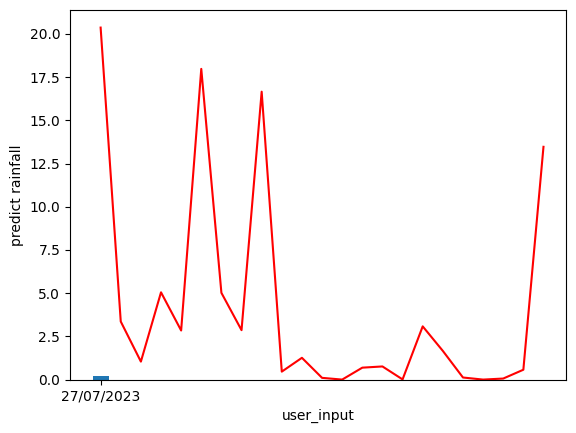

In [20]:
import matplotlib.pyplot as plt

plt.bar(user_input,next_output)
print(next_output)
plt.plot(X,y , color='red')
print(X)
print(y)
plt.xlabel('user_input')
plt.ylabel('predict rainfall')
plt.show()

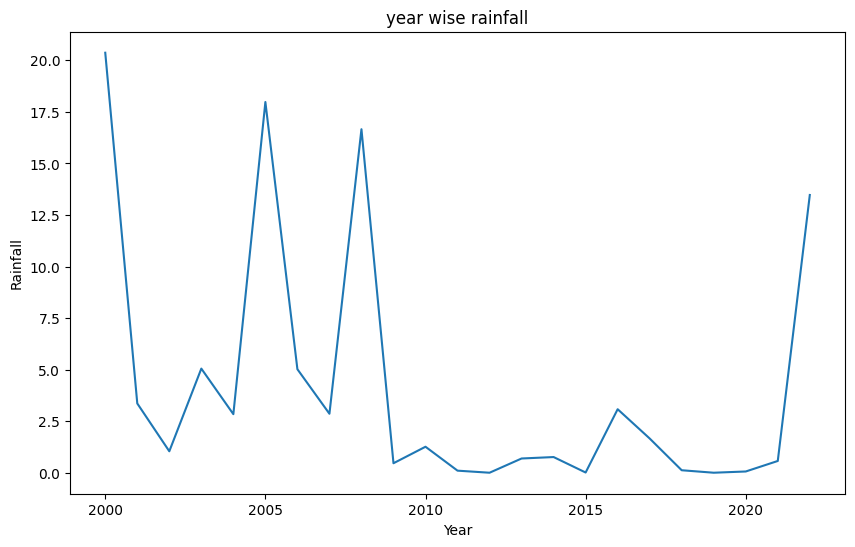

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) #width =10, height=6
plt.plot(filter['year'], rainfall)
plt.title("year wise rainfall")
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.show()